# NLP Pipeline Stages (iterative process)
Refer to From [AIND-NLP Repo](https://github.com/udacity/AIND-NLP/blob/master/text_processing.ipynb)

This content is also from `5.1.4`

## 1. Text Processing: 
removing tags, punctuation, stop words, and normalizing the text
## 2. Feature Extraction
encoding like ASCII, Unicode doesn't work well with NLP, the numbers doesn't have any meaning.
- graph based model: represent words as symbolic nodes (wordnet)
- statistical model: represent words as vectors (word2vec, glove)
- document level tasks: represent documents as vectors (tf-idf, doc2vec)

## 3. Modeling

# NLTK

In [1]:
import nltk
import re

sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
tokens = nltk.word_tokenize(sentence)
print(tokens)

['At', 'eight', "o'clock", 'on', 'Thursday', 'morning', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']


In [15]:
tagged = nltk.pos_tag(tokens, tagset="universal")
print(tagged)

[('At', 'ADP'), ('eight', 'NUM'), ("o'clock", 'NOUN'), ('on', 'ADP'), ('Thursday', 'NOUN'), ('morning', 'NOUN'), ('Arthur', 'NOUN'), ('did', 'VERB'), ("n't", 'ADV'), ('feel', 'VERB'), ('very', 'ADV'), ('good', 'ADJ'), ('.', '.')]


In [23]:
sentence = "Antonio joined the football club in California."
tokens = nltk.word_tokenize(sentence)
entities = nltk.ne_chunk(nltk.pos_tag(tokens))
print(entities)

(S
  (PERSON Antonio/NNP)
  joined/VBD
  the/DT
  football/NN
  club/NN
  in/IN
  (GPE California/NNP)
  ./.)


# Bag of words (BoW)
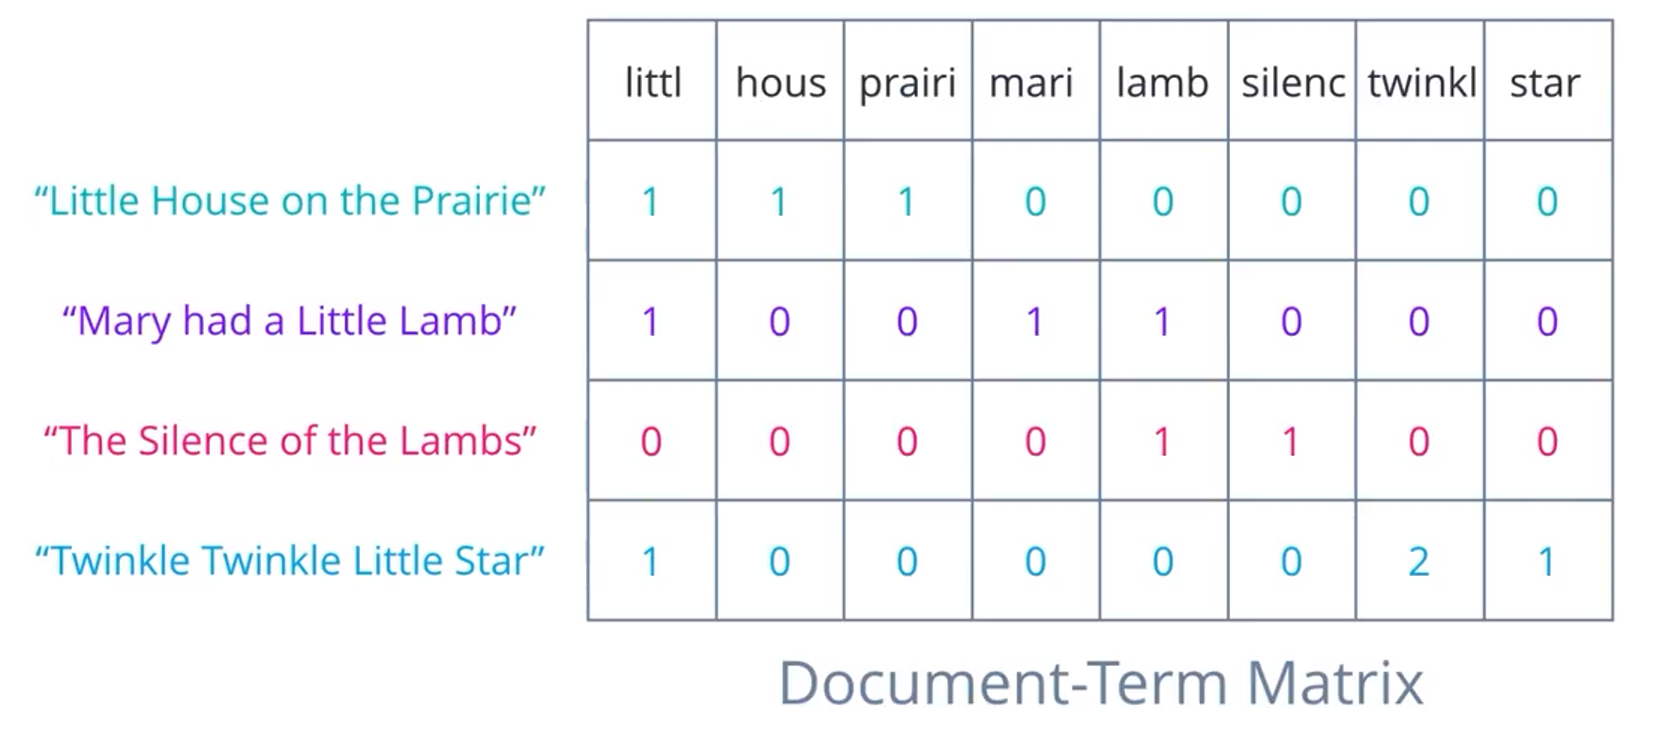

- we can compare the similarity between two documents by comparing the BoW vectors of each document by using `dot product` or `cosine similarity` (better)

# TF-IDF
one caveat of `BoW` is that it treats all words as equally important, but some words are more important than others.

we can solve this by assigning a weight to each word, which represents the how many documents the word appears in, by dividing the number of documents by the number of documents containing the word, 

```python
tf_idf = term_frequency * inverse_document_frequency
term_frequency = (number of times the word appears in the document) / (total number of words in the document)
inverse_document_frequency = log(total number of documents / number of documents containing the word)
```

In [2]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


# Stop Words

In [3]:
from nltk.corpus import stopwords

print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Stemming & Lemmatization

In [5]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaiss', 'it', 'may', 'look', 'bore', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definit', 'watch', 'part', '2', 'it', 'will', 'chang', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'peopl', 'the', 'one', 'who', 'start', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [6]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'one', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


Lemmatization results in real words
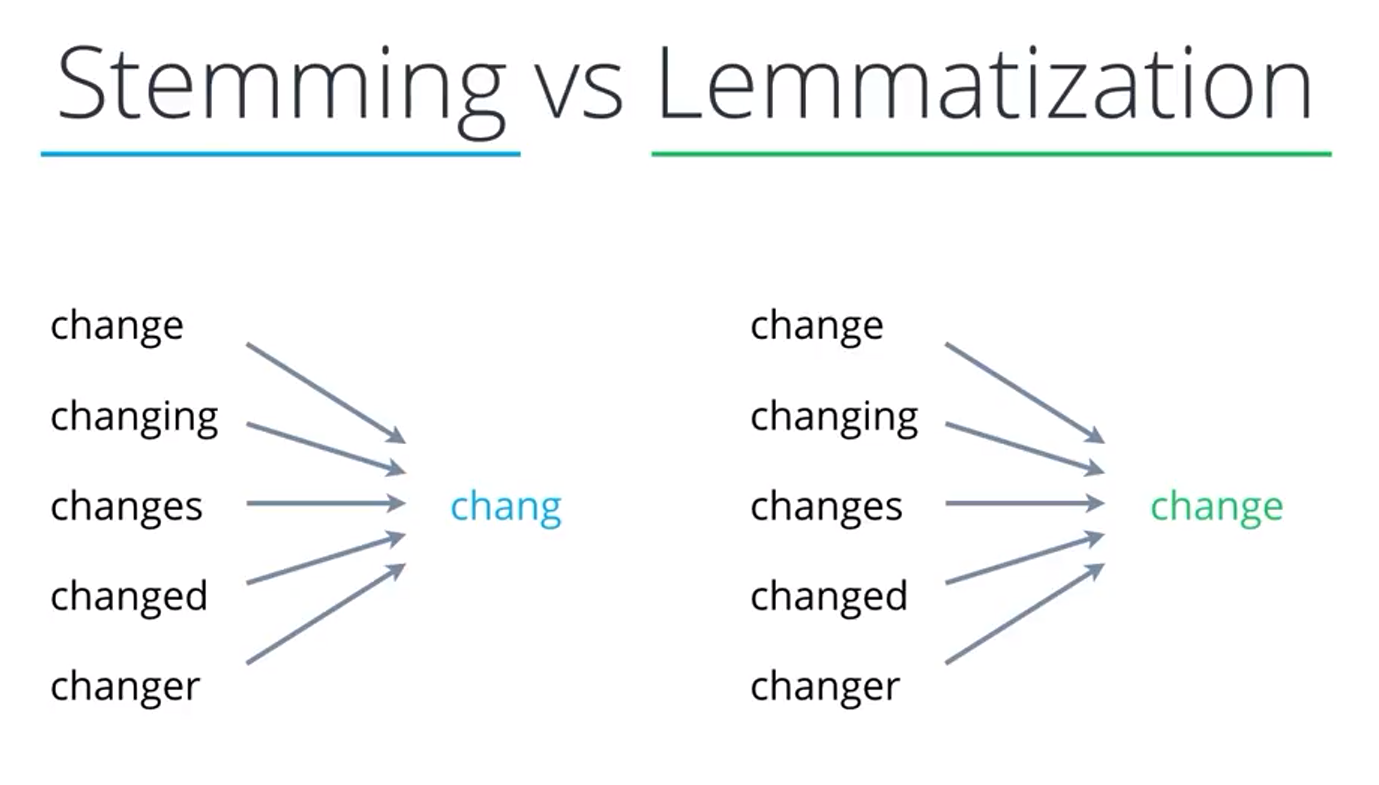

# Pipeline Summary
Text ➡️ Normalize ➡️ Tokenize ➡️ Remove Stop words ➡️ Lemmatize / Stem
